# Prepare Data for EDA and Models

In [13]:
# Imports
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt


#from datetime import datetime, date

In [3]:
def combine_files(path_to_files):
    df = pd.DataFrame()
    file_list = listdir('../data/')
    for file in file_list:
        if ('.csv' in file) & (file != 'all_states.csv'):
            df = pd.concat([df, pd.read_csv(f'../data/{file}')])
    return df

In [4]:
all_states = combine_files('../data/')
all_states.head()

,state,week,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
0,Alaska,2017-12-31,28,46,24,37,0,0,0,0,0,0
1,Alaska,2018-01-07,37,45,25,65,37,0,0,0,0,0
2,Alaska,2018-01-14,10,46,16,53,30,0,0,0,0,0
3,Alaska,2018-01-21,33,41,10,35,14,0,0,0,0,0
4,Alaska,2018-01-28,32,24,0,40,0,0,0,0,0,0


In [5]:
# updating the week column to be datetime type
all_states['week'] = pd.to_datetime(all_states['week'], format = '%Y-%m-%d')
all_states.dtypes

state                          object
week                   datetime64[ns]
depression                      int64
anxiety                         int64
addiction                       int64
counselling                     int64
mental_health                   int64
stay_at_home                    int64
mask_mandate                    int64
gatherings_banned               int64
business_closures               int64
travel_restrictions             int64
dtype: object

In [13]:
# Save combined data to csv
all_states.to_csv('../data/all_states.csv', index=False)

<Figure size 2000x800 with 0 Axes>

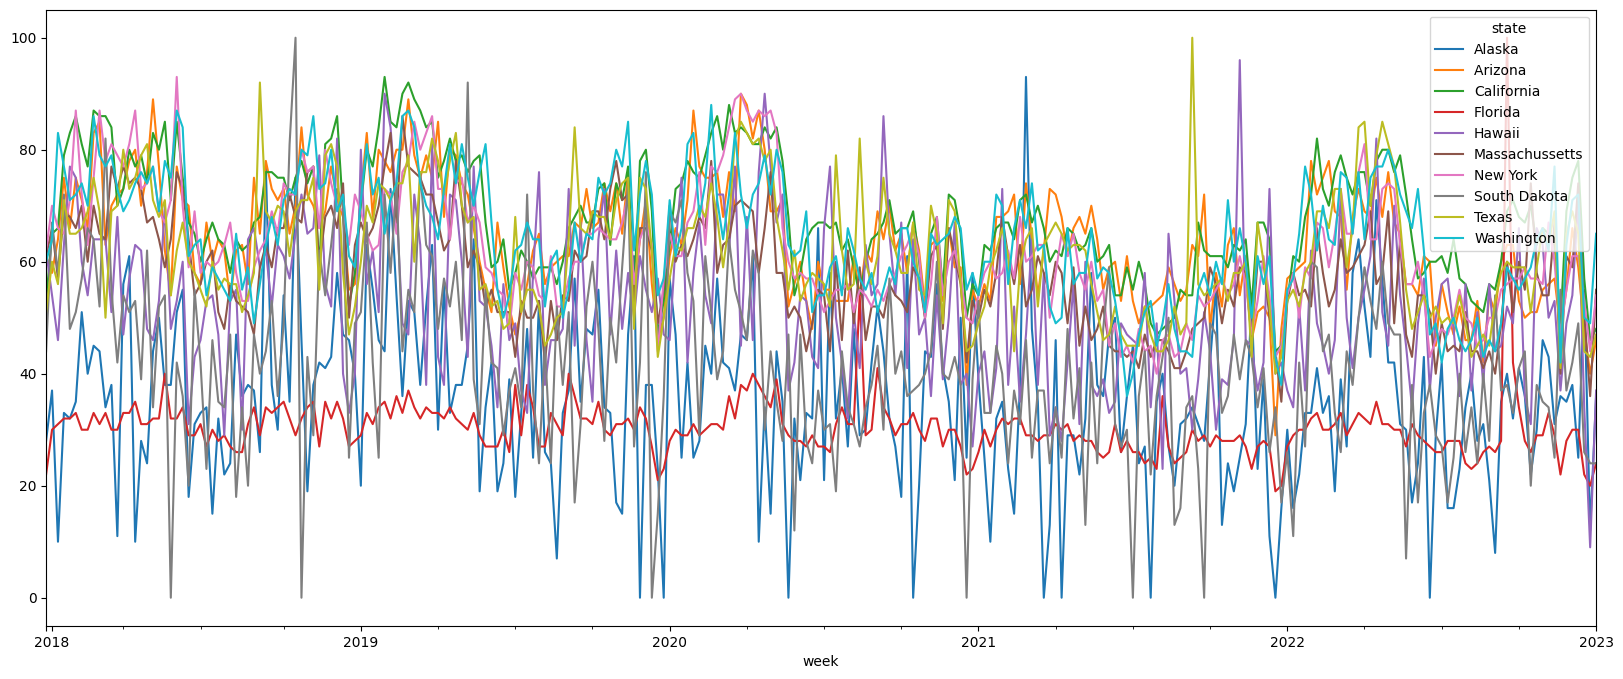

In [22]:
# Group by stats
plt.figure(figsize = (20, 8))
all_states.groupby(['week', 'state']).mean().unstack('state')['depression'].plot(figsize = (20, 8));